# Ejercicios Aprendizaje Automático.

Juan García.
01/10/2016

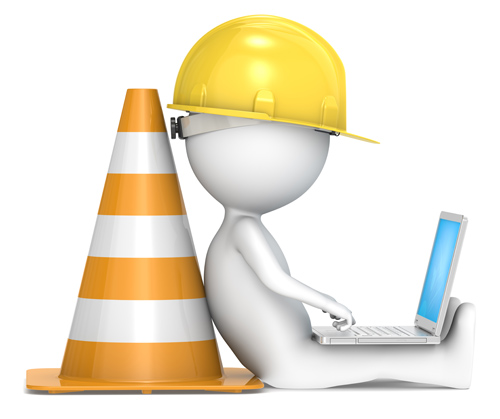

In [16]:
from IPython.display import Image
Image(filename='images/construccion.jpg')

***
# 1. Reglas de asociación
***

## Enunciado

En el “groceries.csv” contiene las transacciones recogidas durante un mes en una tienda de comestibles. En cada una de las filas de este archivo se encuentran los artículos comprados de forma conjunta por los diferentes clientes. Obtener las lista de artículos que tiene un soporte mínimo de 0,15. Obtener también las reglas de asociación que se pueden deducir de este conjunto de datos con un soporte mínimo de 0,05 y confianza de 0,25.

## 1.2 Cargamos los datos del fichero CSV

In [17]:
# Cargamos el fichero CSV con los datos de tickets
import csv
groceries = []
groceries_file = csv.reader(open("data/groceries.csv", "rb"))
for row in groceries_file:
    groceries.append(row)

print 'Los datos se cargan en la variable: groceries'
print 'La variable titanic es de tipo: ', type(groceries)
print 'La variable titanic tiene', len(groceries), "filas (tickets)."
groceries[:10]

Los datos se cargan en la variable: groceries
La variable titanic es de tipo:  <type 'list'>
La variable titanic tiene 9835 filas (tickets).


[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals']]

## 1.2 Obtenemos la lista de artículos que tiene un soporte mínimo de 0,15.

In [18]:
# Importamos la librería apriori.py (descargada previamente de la url sugerida en el enunciado del ejercicio)
import apriori

# Ejecutamos el algoritmo apriori para obtener los k-items frecuentes (F) y el soporte de cada uno de ellos
F, soporte = apriori.apriori(groceries, min_support=0.15, verbose=True)

{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{rolls/buns}:  sup = 0.184


## 1.3 Obtenemos las reglas de asociación que se pueden deducir de este conjunto de datos con un soporte mínimo de 0,05 y confianza de 0,25.

In [19]:
# Primero calculamos el soporte mínimo de 0,05
F, soporte = apriori.apriori(groceries, min_support=0.05, verbose=True)

{citrus fruit}:  sup = 0.083
{curd}:  sup = 0.053
{root vegetables}:  sup = 0.109
{shopping bags}:  sup = 0.099
{bottled beer}:  sup = 0.081
{butter}:  sup = 0.055
{newspapers}:  sup = 0.08
{napkins}:  sup = 0.052
{pip fruit}:  sup = 0.076
{domestic eggs}:  sup = 0.063
{bottled water}:  sup = 0.111
{tropical fruit}:  sup = 0.105
{soda}:  sup = 0.174
{whole milk}:  sup = 0.256
{other vegetables}:  sup = 0.193
{canned beer}:  sup = 0.078
{frankfurter}:  sup = 0.059
{sausage}:  sup = 0.094
{yogurt}:  sup = 0.14
{pastry}:  sup = 0.089
{margarine}:  sup = 0.059
{coffee}:  sup = 0.058
{brown bread}:  sup = 0.065
{fruit/vegetable juice}:  sup = 0.072
{whipped/sour cream}:  sup = 0.072
{pork}:  sup = 0.058
{rolls/buns}:  sup = 0.184
{beef}:  sup = 0.052
{whole milk, yogurt}:  sup = 0.056
{whole milk, rolls/buns}:  sup = 0.057
{whole milk, other vegetables}:  sup = 0.075


In [20]:
# A continuación calculamos las reglas de asociación con una confianza de 0,25.
H = apriori.generate_rules(F, soporte, min_confidence=0.25, verbose=True)

{yogurt} ---> {whole milk}:  conf = 0.402, sup = 0.056
{rolls/buns} ---> {whole milk}:  conf = 0.308, sup = 0.057
{other vegetables} ---> {whole milk}:  conf = 0.387, sup = 0.075
{whole milk} ---> {other vegetables}:  conf = 0.293, sup = 0.075


***
# 2. Implementación de una regresión “stepwise” con eliminación hacia atrás
***

## Enunciado

Utilizando como referencia el código del algoritmo “stepwise” con selección hacia adelante (Fordward Stepwise Regression) que se encuentra en el archivo “CIF005_02_06_Stepwise.ipynb” realizar una implementación del del algoritmo con eliminación hacia atrás (Backward Stepwise Regression). En este caso la selección de las variables se realiza empezando con un modelo que utiliza todas la variables disponibles para ir eliminando en cada paso la que produce el modelo menos significativo.

## Fordward Stepwise Regression

In [8]:
def forward_regression(x, y):
    # Obtencion del conjunto de datos para validación
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    # Modelo para realizar los ajustes
    model = LinearRegression()

    # Variable para almecena los índices de la lista de atributos usados
    feature_list = list(x.columns)
    feature_order = []
    feature_error = []
    feature_names = []

    # Iteración sobre todas las variables
    for i in range(len(feature_list)):
        idx_try = [val for val in range(len(feature_list)) if val not in feature_order]
        iter_error = []

        for i_try in idx_try:
            useRow = feature_order[:]
            useRow.append(i_try)

            use_train = x_train[x_train.columns[useRow]]
            use_test = x_test[x_train.columns[useRow]]

            model.fit(use_train, y_train)
            rmsError = numpy.linalg.norm((y_test - model.predict(use_test)), 2)/sqrt(len(y_test))
            iter_error.append(rmsError)

        pos_best = numpy.argmin(iter_error)
        
        if len(feature_error) == 0 or (iter_error[pos_best] < feature_error[-1]):
            feature_order.append(idx_try[pos_best])
            feature_error.append(iter_error[pos_best])
            feature_names.append(feature_list[idx_try[pos_best]])
            print "Paso", len(feature_error), "variable", feature_list[idx_try[pos_best]], "con RMS", iter_error[pos_best]
        else:
            return feature_names, feature_error, feature_names

    return feature_names, feature_order, feature_error

#forward_regression(x, y)

## Backward Stepwise Regression

In [9]:
def backward_regression(x, y):
    # Obtencion del conjunto de datos para validación
    x_train, x_test, y_train, y_test = train_test_split(x, y)

    # Modelo para realizar los ajustes
    model = LinearRegression()

    # Variable para almecena los índices de la lista de atributos usados
    feature_list = list(x.columns)
    feature_order = []
    feature_error = []
    feature_names = []

    # Iteración sobre todas las variables
    for i in range(len(feature_list)):
        feature_order = range(len(feature_list)-i-1)
        idx_try = [val for val in range(len(feature_list)) if val not in feature_order]
        iter_error = []

        for i_try in idx_try:
            useRow = feature_order[:]
            useRow.append(i_try)

            use_train = x_train[x_train.columns[useRow]]
            use_test = x_test[x_train.columns[useRow]]

            model.fit(use_train, y_train)
            rmsError = numpy.linalg.norm((y_test - model.predict(use_test)), 2)/sqrt(len(y_test))
            iter_error.append(rmsError)

        pos_best = numpy.argmin(iter_error)
        
        if len(feature_error) == 0 or (iter_error[pos_best] < feature_error[-1]):
            feature_order.append(idx_try[pos_best])
            feature_error.append(iter_error[pos_best])
            feature_names.append(feature_list[idx_try[pos_best]])
            print "Paso", len(feature_error), "variable", feature_list[idx_try[pos_best]], "con RMS", iter_error[pos_best]
        else:
            return feature_names, feature_error, feature_names

    return feature_names, feature_order, feature_error

#forward_regression(x, y)

In [8]:
# Variable para almecena los índices de la lista de atributos usados
feature_order =  []
feature_error = []
# Iteración sobre todas las variables
for i in range(len(features)):
    feature_order = range(len(features)-i-1)
    idx_try = [val for val in range(len(features)) if val not in feature_order]
    print 'i: ', i
#    print ' feature_order: ', feature_order
#    print ' idx-try......: ', idx_try
    iter_error = []
    for i_try in idx_try:
        useRow = feature_order[:]
        useRow.append(i_try)
        print '     @ i_try:', i_try, ', useRow: ', useRow
    
        use_train = x_train[x_train.columns[useRow]]
        use_test = x_test[x_train.columns[useRow]]

        model.fit(use_train, y_train)
        rmsError = numpy.linalg.norm((y_test - model.predict(use_test)), 2)/sqrt(len(y_test))
        iter_error.append(rmsError)

    pos_best = numpy.argmin(iter_error)
    print '### pos_best:', pos_best
    #feature_order.append(idx_try[pos_best])
    #feature_error.append(iter_error[pos_best])
    #print '# feature_order: ', feature_order

        
        
        
        

NameError: name 'wine' is not defined

***
# 3 Estimación de la supervivencia de los pasajeros del Titanic.
***

## Enunciado

Utilizando los datos del archivo “titanic.csv”, que contienen información del pasaje del Titanic, para la creación de un modelo que pueda predecir si un pasajero sobrevive al hundimiento del barco en el momento de embarque. Para esto se han de seleccionar la variables con mayor capacidad de predicción.

Para la creación del modelo no se pueden utilizar las variables “boat” ni “body” ya que estas contienen información posterior al momento del embarque.

En el conjunto de datos existes valores NaN en las columnas “age” y “fare”, para eliminar las filas con estos valores se puede utilizar el siguiente comando:

    mask = titanic[['age', 'fare']].applymap(lambda x: math.isnan(x))
    titanic = titanic[-mask.any(axis = 1)]

## 3.1 Librerías y configuración

In [85]:
# Importamos las librerías que necesitaremos
import pandas as pd
import numpy as np

In [87]:
# Configuramos Jupyter para mostrar las gráficas en el notebook
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


## 3.2 Cargamos los datos del fichero CSV

In [88]:
# Cargamos el fichero CSV con los datos de pasajeros del Titanic y mostramos algunos datos
titanic = pd.read_csv("data/titanic.csv", sep=",")
print 'Los datos se cargan en la variable: titanic'
print 'La variable titanic es de tipo: ', type(titanic)
print 'La variable titanic tiene', len(titanic), "filas (pasajeros)."
titanic.head(n = 10)

Los datos se cargan en la variable: titanic
La variable titanic es de tipo:  <class 'pandas.core.frame.DataFrame'>
La variable titanic tiene 1309 filas (pasajeros).


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


## 3.3 Hacemos una limpieza inicial del conjunto de datos

### 3.3.1 Eliminamos las columnas 'boat' y 'body', porque no contienen información relevante para la resolución del problema

In [89]:
# Eliminamos las variables del conjunto de datos
del titanic['boat']
del titanic['body']

# Mostramos como queda el conjunto de datos
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


### 3.3.2 Eliminamos las filas que contengan valores NaN en las columnas “age” y “fare”

Podemos hacerlo de varias maneras:

    A)  mask = titanic[['age', 'fare']].applymap(lambda x: math.isnan(x))
        titanic = titanic[-mask.any(axis = 1)]

    B)  titanic = titanic.dropna(how='any', subset=['age', 'fare'])

En esta ocasión lo haremos con la primera de ellas.

In [90]:
# Guardamos una copia del conjunto de datos original
titanic_org = titanic

# Eliminamos las filas con valores NaN en age o en fare
mask = titanic[['age', 'fare']].applymap(lambda x: math.isnan(x))
titanic = titanic[-mask.any(axis = 1)]

# Mostramos como queda el conjunto de datos
print 'Número original de filas (pasajeros):', len(titanic_org)
print 'Número de filas de datos (pasajeros) descartadas:', (len(titanic_org) - len(titanic))
print 'Nuevo número de pasajeros después de eliminar NaN en age y fare:', len(titanic)
titanic.head()

Número original de filas (pasajeros): 1309
Número de filas de datos (pasajeros) descartadas: 264
Nuevo número de pasajeros después de eliminar NaN en age y fare: 1045


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


## 3.4 Análisis y discretización de variables

La variable objetivo es survived. Como veremos a continuación, survived es una variable binaria.

In [91]:
# Obtenemos la variabilidad de cada una de las variables
titanic.T.apply(lambda x: x.nunique(), axis=1)

pclass          3
survived        2
name         1043
sex             2
age            97
sibsp           7
parch           7
ticket        731
fare          256
cabin         174
embarked        3
home.dest     348
dtype: int64

In [92]:
# Eliminamos las variables que muestran mayor variabilidad y no aportan información relevante: name, ticket y home.dest
del titanic['name']
del titanic['ticket']
del titanic['home.dest']
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,female,29.00,0,0,211.3375,B5,S
1,1,1,male,0.92,1,2,151.5500,C22 C26,S
2,1,0,female,2.00,1,2,151.5500,C22 C26,S
3,1,0,male,30.00,1,2,151.5500,C22 C26,S
4,1,0,female,25.00,1,2,151.5500,C22 C26,S


In [93]:
# Obtenemos los valores distintos de la variable objetivo
print 'Valores de la variable survived: ', titanic.survived.unique()

# Obtenemos los valores distintos de las variables que muestran menor variabilidad
print 'Valores de la variable pclass..: ', titanic.pclass.unique()
print 'Valores de la variable sex.....: ', titanic.sex.unique()
print 'Valores de la variable sibsp...: ', titanic.sibsp.unique()
print 'Valores de la variable parch...: ', titanic.parch.unique()
print 'Valores de la variable embarked: ', titanic.embarked.unique()

Valores de la variable survived:  [1 0]
Valores de la variable pclass..:  [1 2 3]
Valores de la variable sex.....:  ['female' 'male']
Valores de la variable sibsp...:  [0 1 2 3 4 5 8]
Valores de la variable parch...:  [0 2 1 4 3 5 6]
Valores de la variable embarked:  ['S' 'C' nan 'Q']


In [94]:
# Clasificamos las variables segun sus características
var_target = titanic['survived']
var_numericas = ['age', 'fare']
var_categoricas = ['pclass', 'sex', 'sibsp', 'parch', 'cabin', 'embarked']

Las variables se pueden analizar utilizando tablas de frecuencia para comprobar la forma en que se reparten sus valores.

En las variables con niveles con pocos registros significativos hay que hacer reagrupaciones de éstos últimos con otros, de forma que puedan ser significativos. Para ello se puede utilizar el peso de la evidencia (WoE, Weight of Evidence), comparando la capacidad predictiva de cada uno de los niveles de la variable.

In [95]:
# Obtenemos las tablas de frecuencias de las variables categóricas respecto de la variable survived
for var in var_categoricas:
    print "Tabla de frecuencias para la variable", var, "respecto de la variable survived:"
    print pd.crosstab(titanic['survived'], titanic[var])
    print

Tabla de frecuencias para la variable pclass respecto de la variable survived:
pclass      1    2    3
survived               
0         103  146  369
1         181  115  131

Tabla de frecuencias para la variable sex respecto de la variable survived:
sex       female  male
survived              
0             96   522
1            292   135

Tabla de frecuencias para la variable sibsp respecto de la variable survived:
sibsp       0    1   2   3   4  5  8
survived                            
0         429  133  20  10  19  6  1
1         255  147  16   6   3  0  0

Tabla de frecuencias para la variable parch respecto de la variable survived:
parch       0   1   2  3  4  5  6
survived                         
0         497  65  42  3  4  5  2
1         270  95  55  5  1  1  0

Tabla de frecuencias para la variable cabin respecto de la variable survived:
cabin     A10  A11  A16  A18  A20  A21  A23  A24  A26  A29 ...  E8  F  F E57  \
survived                                               

Descartamos la variable cabin, porque que la dispersión de frecuencias que presenta no aporta información válida para el problema que nos ocupa.

In [96]:
del titanic['cabin']
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.5500,S
2,1,0,female,2.00,1,2,151.5500,S
3,1,0,male,30.00,1,2,151.5500,S
4,1,0,female,25.00,1,2,151.5500,S


Las variables sibsp y parch presentan niveles con pocos registros, por lo que las reagruparemos utilizando el peso de la evidencia (WoE).

In [97]:
# Creamos una función para determinar el peso de la evidencia de los niveles de una variable
def get_WoE(data, var, target):
    crosstab = pd.crosstab(data[target], data[var])
    print "Obteniendo el Woe para la variable", var, ":"    
    for col in crosstab.columns:
        if crosstab[col][1] == 0:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es infinito"
        else:
            print "  El WoE para", col, "[", sum(crosstab[col]), "] es", np.log(float(crosstab[col][0]) / float(crosstab[col][1]))

**Reagrupamos la variable sibsp**

In [98]:
# Obtenemos el peso de la evidencia de la variable
get_WoE(titanic, 'sibsp', 'survived') 

Obteniendo el Woe para la variable sibsp :
  El WoE para 0 [ 684 ] es 0.52019337377
  El WoE para 1 [ 280 ] es -0.100083458557
  El WoE para 2 [ 36 ] es 0.223143551314
  El WoE para 3 [ 16 ] es 0.510825623766
  El WoE para 4 [ 22 ] es 1.8458266905
  El WoE para 5 [ 6 ] es infinito
  El WoE para 8 [ 1 ] es infinito


La variable sibsp presenta muy pocas ocurrencias de los valores 2, 3, 4, 5 y 8 en comparación con los valores 0 y 1.
Por ello vamos a reagrupar los valores y crear una nueva clasificación sibspX: 

In [99]:
# Reagrupamos los valores de la variable en nuevos niveles
titanic.loc[:, 'sibspX'] = None

for row in titanic.index:
    if   titanic.loc[row, 'sibsp'] in (0, 3):
        titanic.loc[row, 'sibspX'] = 'n0'
    elif titanic.loc[row, 'sibsp'] == 1:
        titanic.loc[row, 'sibspX'] = 'n1'
    elif titanic.loc[row, 'sibsp'] == 2:
        titanic.loc[row, 'sibspX'] = 'n2'
    else:
        titanic.loc[row, 'sibspX'] = 'nX'
        
get_WoE(titanic, 'sibspX', 'survived') 

Obteniendo el Woe para la variable sibspX :
  El WoE para n0 [ 700 ] es 0.519979005752
  El WoE para n1 [ 280 ] es -0.100083458557
  El WoE para n2 [ 36 ] es 0.223143551314
  El WoE para nX [ 29 ] es 2.15948424935


**Reagrupamos la variable parch**

In [100]:
# Obtenemos el peso de la evidencia de la variable
get_WoE(titanic, 'parch', 'survived') 

Obteniendo el Woe para la variable parch :
  El WoE para 0 [ 767 ] es 0.610168067098
  El WoE para 1 [ 160 ] es -0.379489621705
  El WoE para 2 [ 97 ] es -0.269663566949
  El WoE para 3 [ 8 ] es -0.510825623766
  El WoE para 4 [ 5 ] es 1.38629436112
  El WoE para 5 [ 6 ] es 1.60943791243
  El WoE para 6 [ 2 ] es infinito


La variable parch presenta muy pocas ocurrencias de los valores 3, 4, 5 y 6 en comparación con los valores 0, 1 y 2.
Por ello vamos a reagrupar los valores y crear una nueva clasificación parchX: 

In [101]:
# Reagrupamos los valores de la variable en nuevos niveles
titanic.loc[:, 'parchX'] = None

for row in titanic.index:
    if   titanic.loc[row, 'parch'] == 0:
        titanic.loc[row, 'parchX'] = 'n0'
    elif titanic.loc[row, 'parch'] == 1:
        titanic.loc[row, 'parchX'] = 'n1'
    elif titanic.loc[row, 'parch'] == 2:
        titanic.loc[row, 'parchX'] = 'n2'
    elif titanic.loc[row, 'parch'] == 3:
        titanic.loc[row, 'parchX'] = 'n3'
    else:
        titanic.loc[row, 'parchX'] = 'nX'

get_WoE(titanic, 'parchX', 'survived') 

Obteniendo el Woe para la variable parchX :
  El WoE para n0 [ 767 ] es 0.610168067098
  El WoE para n1 [ 160 ] es -0.379489621705
  El WoE para n2 [ 97 ] es -0.269663566949
  El WoE para n3 [ 8 ] es -0.510825623766
  El WoE para nX [ 13 ] es 1.70474809224


### Análisis de las variables continuas
Las variables continuas pueden analizarse mediante la utilización de histogramas.
Se obtienen histogramas tanto para los valores positivos de la variable target (objetivo) como para los valores negativos.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f346554d150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f34651b8d10>]], dtype=object)

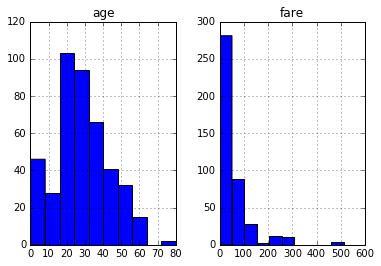

In [102]:
# Histogramas de variables continuas para valores positivos del target
titanic[var_numericas][var_target == 1].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34650e7850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f34651b5d90>]], dtype=object)

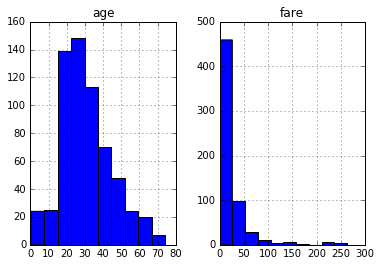

In [103]:
# Histogramas de variables continuas para valores negativos del target
titanic[var_numericas][var_target == 0].hist()

Vamos a **analizar la varaible age** superponiendo sus histogramas:

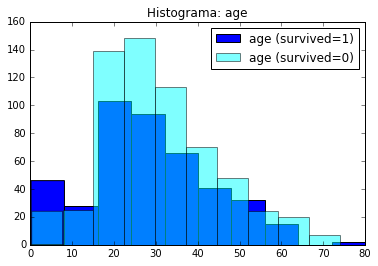

In [104]:
import matplotlib.pyplot as plt
plt.hist(titanic['age'][var_target == 1], bins=10, histtype='bar', color='blue', label='age (survived=1)') 
plt.hist(titanic['age'][var_target == 0], bins=10, histtype='bar', color='cyan', label='age (survived=0)', alpha=0.5)
plt.title('Histograma: age')
plt.legend()
plt.show()

Podemos ver varias zonas, pero seleccionaremos las siguientes para hacer una nueva agrupación binaria:
- survived = 1:
    - age < 15
    - age >= 52 and age <=57
    - age > 75
- survived = 0
    - el resto

In [105]:
titanic.loc[:, 'ageX'] = titanic['age'].map(lambda x: 'n1' if x<15 or (x>=52 and x<=57) or x>75 else 'n0')
get_WoE(titanic, 'ageX', 'survived') 

Obteniendo el Woe para la variable ageX :
  El WoE para n0 [ 896 ] es 0.463479503169
  El WoE para n1 [ 149 ] es -0.174941449496


Vamos a **analizar la varaible fare** superponiendo sus histogramas:

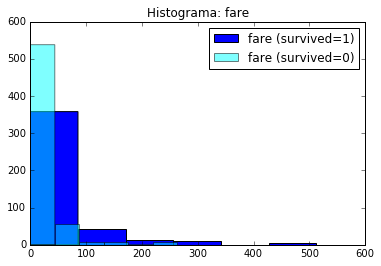

In [106]:
import matplotlib.pyplot as plt
plt.hist(titanic['fare'][var_target == 1], bins=6, histtype='bar', color='blue', label='fare (survived=1)') 
plt.hist(titanic['fare'][var_target == 0], bins=6, histtype='bar', color='cyan', label='fare (survived=0)', alpha=0.5)
plt.title('Histograma: fare')
plt.legend()
plt.show()

En la variable fare podemos distinguir claramente dos zonas para hacer una nueva agrupación binaria:
- survived = 0:
    - en los valores por debajo de 50 hay mayoría de survived=0
- survived = 1:
    - a partir de 50 predominan los valores surived=1. 

Por tanto, podemos crear una nueva variable categórica a partir de los datos numéricos.

In [107]:
titanic.loc[:, 'fareX'] = titanic['fare'].map(lambda x: 'n0' if x < 50 else 'n1')
get_WoE(titanic, 'fareX', 'survived') 

Obteniendo el Woe para la variable fareX :
  El WoE para n0 [ 831 ] es 0.671563608893
  El WoE para n1 [ 214 ] es -0.764098916532


### Nuevo conjunto de datos

In [109]:
del titanic['age']
del titanic['sibsp']
del titanic['parch']
del titanic['fare']
titanic.head()

,pclass,survived,sex,embarked,sibspX,parchX,ageX,fareX
0,1,1,female,S,n0,n0,n0,n1
1,1,1,male,S,n1,n2,n1,n1
2,1,0,female,S,n1,n2,n1,n1
3,1,0,male,S,n1,n2,n0,n1
4,1,0,female,S,n1,n2,n0,n1


## Creamos un modelo con variables discretizadas

In [112]:
from sklearn.linear_model.logistic import LogisticRegression

data_model = concatenate((pd.get_dummies(titanic['pclass']),
                          pd.get_dummies(titanic['sex']),
                          pd.get_dummies(titanic['embarked']),
                          pd.get_dummies(titanic['ageX']),
                          pd.get_dummies(titanic['parchX']),
                          pd.get_dummies(titanic['fareX']),
                          pd.get_dummies(titanic['sibspX'])), axis = 1)

classifier = LogisticRegression().fit(data_model, var_target)
y_pred     = classifier.predict(data_model)

print data_model

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  1.  0.  0.]
 [ 1.  0.  0. ...,  1.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]]


 Creamos una función para obtener métricas de modelos de clasificación binarios

In [114]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

# Función para obtener métricas de modelos de clasificación binarios
def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print "La matriz de confusión es "
    print confusion_matrix

    print 'Precisión:', accuracy_score(y_true, y_pred)
    print 'Exactitud:', precision_score(y_true, y_pred)
    print 'Exhaustividad:', recall_score(y_true, y_pred)
    print 'F1:', f1_score(y_true, y_pred)

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print 'AUC:', auc(false_positive_rate, recall)

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title('AUC = %0.2f' % roc_auc)

Obtenemos las métricas de rendimiento del modelo (modelos de clasificación bianios)

La matriz de confusión es 
[[522 128]
 [ 96 299]]
Precisión: 0.785645933014
Exactitud: 0.700234192037
Exhaustividad: 0.756962025316
F1: 0.727493917275
AUC: 0.780019474197


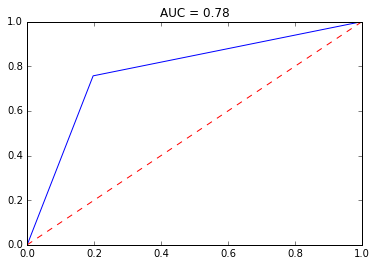

In [115]:
metricas_modelos(y_pred, var_target)

In [116]:
classifier.coef_

array([[ 0.52504962,  0.04951825, -0.65074932,  1.21791779, -1.29409924,
         0.49679043, -0.66030219, -0.14307297, -0.39148595,  0.3153045 ,
         0.0257657 ,  0.54209308,  0.31298317,  0.04688892, -1.00391231,
        -0.21992616,  0.14374471,  0.59296262,  0.38590245,  0.10593416,
        -1.16098068]])

In [117]:
# ???????????????????????????????

## Factor de inflación de la varianza (VIF)

Vamos a ver si podemos eliminar variables mediante el VIF.

Creamos una función para calcular el VIF

In [125]:
from sklearn.linear_model import LinearRegression

# Creamos una función para calcular el VIF
def calculateVIF(data):
    features = list(data.columns)
    num_features = len(features)
    
    model = LinearRegression()
    
    result = pd.DataFrame(index = ['VIF'], columns = features)
    result = result.fillna(0)
    
    for ite in range(num_features):
        x_features = features[:]
        y_featue = features[ite]
        x_features.remove(y_featue)
        
        x = data[x_features]
        y = data[y_featue]
        
        model.fit(data[x_features], data[y_featue])
        
        result[y_featue] = 1/(1 - model.score(data[x_features], data[y_featue]))
    
    return result


In [121]:
titanic_vif = titanic.copy(deep = True)
features = list(titanic_vif.columns)
features.remove('survived')
titanic_vif = titanic_vif[features]
titanic_vif.head()

,pclass,sex,embarked,sibspX,parchX,ageX,fareX
0,1,female,S,n0,n0,n0,n1
1,1,male,S,n1,n2,n1,n1
2,1,female,S,n1,n2,n1,n1
3,1,male,S,n1,n2,n0,n1
4,1,female,S,n1,n2,n0,n1


In [124]:
calculateVIF(titanic_vif)

ValueError: could not convert string to float: n0

In [125]:
# Pasamos los datos a una lista
ltitanic = titanic.values.tolist()
type(ltitanic)
ltitanic[:2]

[[1,
  1,
  'Allen, Miss. Elisabeth Walton',
  'female',
  29.0,
  0,
  0,
  '24160',
  211.3375,
  'B5',
  'S',
  'St Louis, MO'],
 [1,
  1,
  'Allison, Master. Hudson Trevor',
  'male',
  0.92,
  1,
  2,
  '113781',
  151.55,
  'C22 C26',
  'S',
  'Montreal, PQ / Chesterville, ON']]

- Más info:
    - [https://www.encyclopedia-titanica.org/titanic-passenger-list/](https://www.encyclopedia-titanica.org/titanic-passenger-list/)